# Project
Here is a walk through of building a notebook to build some noisy data and then fit it to a model.

Build the model
Build a function that defines a Gaussian distribution, the function should take 4 variables and return a numpy array containing the distribution. The input variables should be;
 1.) the X values of the distribution
 2.) The amplitude of the distribution
 3.) The centre point of the distribution
 4.) The width of the distribution
$
Ydata = A * \exp^{\frac{(x-x_0)^2}{\sigma^2}}
$

In [4]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def Gaussian(xdata, amplitude, centre, width):
    Ydata = amplitude * np.exp(-1*((centre-xdata)**2)/((width**2)))
    return  (Ydata)



Once you have defined the function test it by calling it with x data ranging from 0 to 100. Set the amplitude to 1, the centre to 50 and the width to 10. Plot the data (x,y).

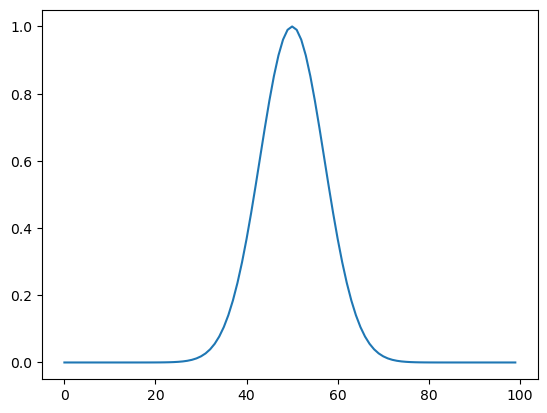

In [6]:
xdata = np.linspace(0,99,100)
ydata = Gaussian(xdata, 1, 50, 10)
plt.plot(xdata,ydata)

# Make the data noisy
to the ydata you produced previously add noise to it.  Generate gaussian noise using the numpy function random.normal.
np.random.normal(0,noiseLevel,numberPoints)
Here set the noise level to 0.1 and the number of points as the number of points you used to generate the Gaussian, i.e. the size of the xdata.
Add this noise to the ydata.

In [7]:
noiseLevel = .1
numberPoints = 100
ydata = ydata + np.random.normal(0,noiseLevel,numberPoints)

Plot the new noisy data.

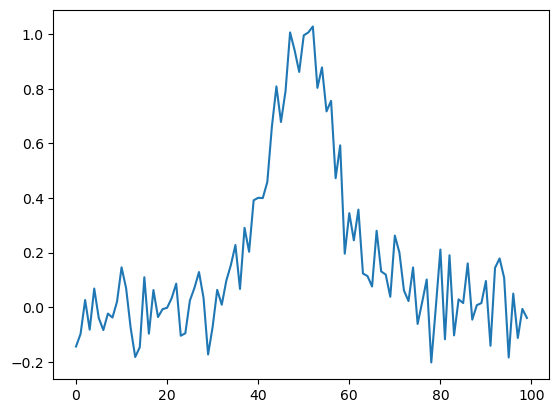

In [8]:
plt.plot(xdata,ydata)

# Fit the data
Using the function you have just created fit the noisy data using the curve fit function in scipy.
print the fitted parameters.


In [9]:
popt, pcov = curve_fit(Gaussian, xdata, ydata)
print(popt)

[-0.50695405  0.4665617   0.41556353]


It is likely that the fit did not work. If it did lets pretend that it did not.
We need to pass the fitting function some guesses.


In [10]:
# Calculate the maximum value of the noisy Ydata and store it in a variable called maximum.
maximum = np.max(ydata)

In [11]:
# Calculate the X position of the maximum value of the noisy Ydata and store it in a variable called maxpos.
maxpos = (np.where(ydata == np.max(ydata)))
maxpos = xdata[maxpos[0]]
maxpos = maxpos[0]

In [12]:
# For the width guess we just need to guess, lets try one
widthGuess = 1

In [13]:
# Lets build our guesses
guess = np.asarray([maximum, maxpos, widthGuess])

In [14]:
# Try using the guesses to fit the data
popt, pcov = curve_fit(Gaussian, xdata, ydata, p0=guess)
print(popt)

[ 0.96582823 49.77332754 10.33650603]


# Use the newly calculated parameters to display the fit curve and the noisy data points on the same plot.

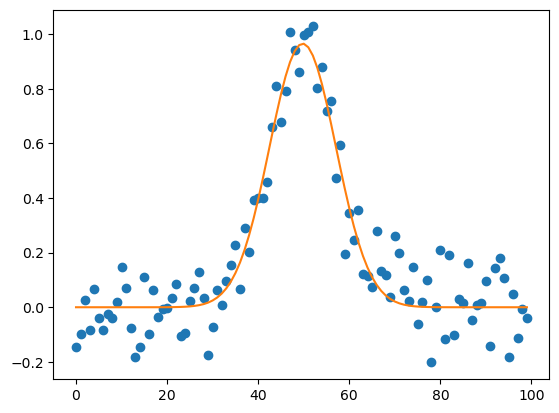

In [15]:
fitData = Gaussian(xdata, *popt)
plt.plot(xdata, ydata,'o')
plt.plot(xdata, fitData)

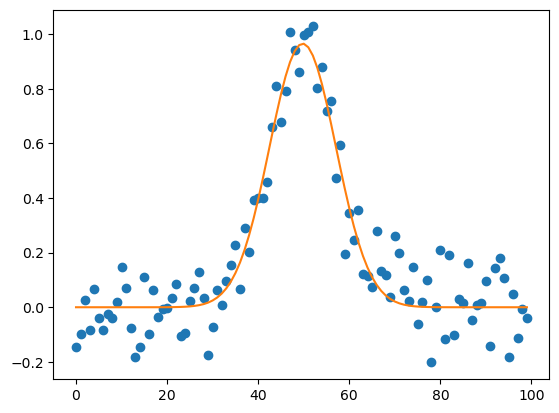

In [17]:
fitData = Gaussian(xdata, *popt)
plt.plot(xdata, ydata,'o')
plt.plot(xdata, fitData)